In [2]:
# !pip install opencv-python
import cv2

In [3]:
import mediapipe as mp

In [4]:
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imshow('Mediapipe Feed', frame1)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

### 1. Make Detections

In [7]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        cv2.putText(image, "santosh", 
                           (25,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [8]:
mp_drawing.DrawingSpec

mediapipe.python.solutions.drawing_utils.DrawingSpec

In [9]:
results.pose_landmarks.landmark

[x: 0.7023726105690002
y: 0.6157979965209961
z: -0.9375683069229126
visibility: 0.9993173480033875
, x: 0.7052116394042969
y: 0.5655660629272461
z: -0.8886569738388062
visibility: 0.9983612298965454
, x: 0.7122700214385986
y: 0.5659710764884949
z: -0.8885622024536133
visibility: 0.9986083507537842
, x: 0.7187795639038086
y: 0.5667926073074341
z: -0.8884914517402649
visibility: 0.9978194236755371
, x: 0.6759594082832336
y: 0.5695768594741821
z: -0.9300991296768188
visibility: 0.9988712668418884
, x: 0.6606401801109314
y: 0.5736554265022278
z: -0.9299362301826477
visibility: 0.9992156624794006
, x: 0.6445552110671997
y: 0.5793335437774658
z: -0.9302579164505005
visibility: 0.9989903569221497
, x: 0.7135752439498901
y: 0.5912843942642212
z: -0.5381907224655151
visibility: 0.9976523518562317
, x: 0.6040070652961731
y: 0.6106247305870056
z: -0.7257217168807983
visibility: 0.9994373917579651
, x: 0.7116755247116089
y: 0.6642158627510071
z: -0.8002870678901672
visibility: 0.9987706542015076
,

In [10]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

[x: 0.552137553691864
y: 0.744577944278717
z: -0.5019239187240601
visibility: 0.9999619722366333
, x: 0.562012791633606
y: 0.6944368481636047
z: -0.4723469614982605
visibility: 0.9998601675033569
, x: 0.5721228718757629
y: 0.6933538913726807
z: -0.4722065031528473
visibility: 0.9999114274978638
, x: 0.5821064710617065
y: 0.69318026304245
z: -0.4716572165489197
visibility: 0.999813973903656
, x: 0.5310746431350708
y: 0.6984438300132751
z: -0.47403329610824585
visibility: 0.9998468160629272
, x: 0.5203839540481567
y: 0.7004616856575012
z: -0.4734516143798828
visibility: 0.9998620748519897
, x: 0.5104342699050903
y: 0.7030775547027588
z: -0.4736706614494324
visibility: 0.999700665473938
, x: 0.5989304780960083
y: 0.7128524780273438
z: -0.28825125098228455
visibility: 0.9998712539672852
, x: 0.4987195134162903
y: 0.7274873852729797
z: -0.28875723481178284
visibility: 0.9999139308929443
, x: 0.5788086652755737
y: 0.7827274203300476
z: -0.43397408723831177
visibility: 0.9998421669006348
, x:

In [11]:
len(landmarks)

33

In [12]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [15]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.7626063823699951
y: 0.8193933963775635
z: -0.14087258279323578
visibility: 0.9978365302085876

In [17]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].visibility

0.9978365302085876

In [14]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

x: 0.9001703262329102
y: 1.1098740100860596
z: -0.27626579999923706
visibility: 0.31910187005996704

In [18]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.8267815709114075
y: 1.0727736949920654
z: -0.5709370970726013
visibility: 0.6469199061393738

### 3. Calculate Angles

In [33]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [34]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [35]:
shoulder, elbow, wrist

([0.6106528043746948, 0.8740615844726562],
 [0.7086157202720642, 1.1458792686462402],
 [0.7425775527954102, 1.400142788887024])

In [36]:
calculate_angle(shoulder, elbow, wrist)

167.7888042735461

In [37]:
tuple(np.multiply(elbow, [640, 480]).astype(int))

(453, 550)

In [38]:
cap = cv2.VideoCapture(0)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
              # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                       
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

### 4. Curl Counter

In [40]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
             # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
          
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6
7
8


In [1]:
import cv2
import socket
import pickle
import struct

def recv_frame(server_socket):
    # Receive the size of the serialized frame (4 bytes)
    message_size_data = server_socket.recv(4)
    if not message_size_data:
        return None
    # Unpack the size of the serialized frame
    message_size = struct.unpack("i", message_size_data)[0]
    # Receive the serialized frame
    frame_data = b""
    while len(frame_data) < message_size:
        data = server_socket.recv(message_size - len(frame_data))
        if not data:
            break
        frame_data += data
    # Deserialize the frame
    frame = pickle.loads(frame_data)
    return frame

def main():
    # IP address and port of the server
    server_ip = "192.168.232.242"  # Replace with the IP address of the server laptop
    server_port = 12345

    # Initialize socket
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect((server_ip, server_port))

    while True:
        # Receive frame from server
        frame = recv_frame(client_socket)
        if frame is None:
            break

        # Display received frame
        cv2.imshow("Frame from Server", frame)

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    client_socket.close()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


In [1]:
import cv2

# RTSP URL of the drone camera
rtsp_url = 'rtsp://192.168.10.3/stream'

# Create a VideoCapture object
cap = cv2.VideoCapture(rtsp_url)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Loop to read frames from the camera
while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    
    # Check if the frame is read successfully
    if not ret:
        print("Error: Failed to read frame.")
        break
    
    # Display the frame
    cv2.imshow("Drone Camera", frame)
    
    # Check for key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


Error: Could not open camera.
Error: Failed to read frame.


In [4]:
def calc_angle(x, y, z):
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    radians = np.arctan2(z[1]-y[1], z[0]-y[0]) - np.arctan2(x[1]-y[1], x[0]-y[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

In [5]:
def recognise_curl(detection):
    
    global counter
    global state
    global feedback
    global range_flag
    global left_angle
    global right_angle
    
    try:
        landmarks = detection.pose_landmarks.landmark
        
        # left arm
        left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y] 

        # right arm
        right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
        right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
        
        left_elbow_angle = calc_angle(left_shoulder, left_elbow, left_wrist)
        right_elbow_angle = calc_angle(right_shoulder, right_elbow, right_wrist)
        left_angle.append(int(left_elbow_angle))
        right_angle.append(int(right_elbow_angle))
        # down state
        if left_elbow_angle > 160 and right_elbow_angle > 160:
            if not range_flag:
                feedback = 'Did not curl completely.'
            else:
                feedback = 'Good rep!'
            state = 'Down'
            
        # not fully curled
        elif (left_elbow_angle > 50 and right_elbow_angle > 50) and state == 'Down':
            range_flag = False
            feedback = ''
            
        # up state
        elif (left_elbow_angle < 30 and right_elbow_angle < 30) and state == 'Down':
            state = 'Up'
            feedback = ''
            range_flag = True
            counter += 1
    
    except:
        left_angle.append(180)
        right_angle.append(180)

In [6]:
def recognise_squat(detection):
    
    global counter
    global state
    global feedback
    global left_angle
    global right_angle
       
    try:
        landmarks = detection.pose_landmarks.landmark
        
        # GET COORDINATES
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
        
        right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
        right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
        right_heel = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
        
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

        left = calc_angle(left_hip, left_knee, left_heel)
        right = calc_angle(right_hip, right_knee, right_heel)        
        left_angle.append(int(left))
        right_angle.append(int(right))
         #POSE CHECKING 1: Knees bending inwards    
        shoulder_dist = left_shoulder[0] - right_shoulder[0]
        knee_dist = left_knee[0] - right_knee[0]

        if shoulder_dist - knee_dist > 0.04:
            feedback = 'Open up your knees further apart to shoulder width!'
        else:
            feedback = ''

        # standing up
        if left > 170 and right > 170:
            state = "Up"
            
        if left < 165 and right < 165:
            feedback = 'Almost there... lower until height of hips!'
            
        if left < 140 and right < 140 and state == "Up":
            state = "Down"
            counter += 1
            
        if state == "Down":
            feedback = 'Good rep!'
    
    except:
        left_angle.append(180)
        right_angle.append(180)

In [7]:
def recognise_situp(detection):
    
    global counter
    global state
    global feedback
    global range_flag
    global halfway
    global body_angles
    
    try: 
        landmarks = detection.pose_landmarks.landmark
        
        left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
        left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

        # CALCULATE ANGLES 
        angle_knee = calc_angle(left_hip, left_knee, left_heel)
        angle_body = calc_angle(left_shoulder, left_hip, left_knee)
        body_angles.append(int(angle_body))
      
        if (angle_body < 80 and angle_body > 50) and state == "Down": #Half-way there (Used for checking bad situps)
            halfway = True

        if angle_body < 40 and state == "Down": #Complete situp
            state = "Up"
            range_flag = True
        if angle_body > 90 and angle_knee < 60: #Resting position;to check if situp was done properly
            state = "Down"
            
            if halfway: #Check if a rep was attempted
                if range_flag: #Check if a proper rep was performed
                    counter += 1
                    feedback = "Good repetition!"
                else:
                    feedback = "Did not perform sit up completely."
                range_flag = False #Reset vars
                halfway = False
                
        if angle_knee > 70: #Triggers anytime the legs are not tucked in
            feedback = "Keep legs tucked in closer"

    except: 
        body_angles.append(180)

In [8]:
def plot_viz(user_choice):
    
    # Set figure size
    plt.rcParams["figure.figsize"] = (20,5)
    
    # Squat viz
    if user_choice == 1:
        fig, ax = plt.subplots()
        ax.plot(frames, left_angle, '-', color = 'red', label = 'Left Knee Angle')
        ax.plot(frames, right_angle, '-', color = 'blue', label = 'Right Knee Angle')
        ax.axhline(y=140, color='g', linestyle='--')
        ax.legend(loc = 'center left')
        ax.set_xlabel('Frames')
        ax.set_ylabel('Angle')
        print(f'Congratulations! You managed {counter} squats!')
        
    # Curl viz
    elif user_choice == 2:
        fig, ax = plt.subplots()
        ax.plot(frames, left_angle, '-', color = 'red', label = 'Left Arm Angle')
        ax.plot(frames, right_angle, '-', color = 'blue', label = 'Right Arm Angle')
        ax.axhline(y=30, color='g', linestyle='--')
        ax.legend(loc = 'center left')
        ax.set_xlabel('Frames')
        ax.set_ylabel('Angle')
        print(f'Congratulations! You managed {counter} curls!')
        
    # Situp viz
    else:
        plt.plot(frames, body_angles, '-', color = 'red', label = 'Body Angle')
        plt.axhline(y=40, color='g', linestyle='--')
        plt.xlabel('Frames')
        plt.ylabel('Angle')
        print(f'Congratulations! You managed {counter} situps!')

Which exercise would you like to do? Please enter 1, 2 or 3.
1. Squat 
2. Arm Curl 
3. Sit-up
 2



Please wait a moment...
Click on the new window when it appears.

--------------------------------------------------------------------------------------

Congratulations! You managed 0 curls!

The red/blue lines show the angle of your targetted body part throughout your exercise,
whereas the green dotted line is the minimum angle required for the exercise to be recorded as one repetition.


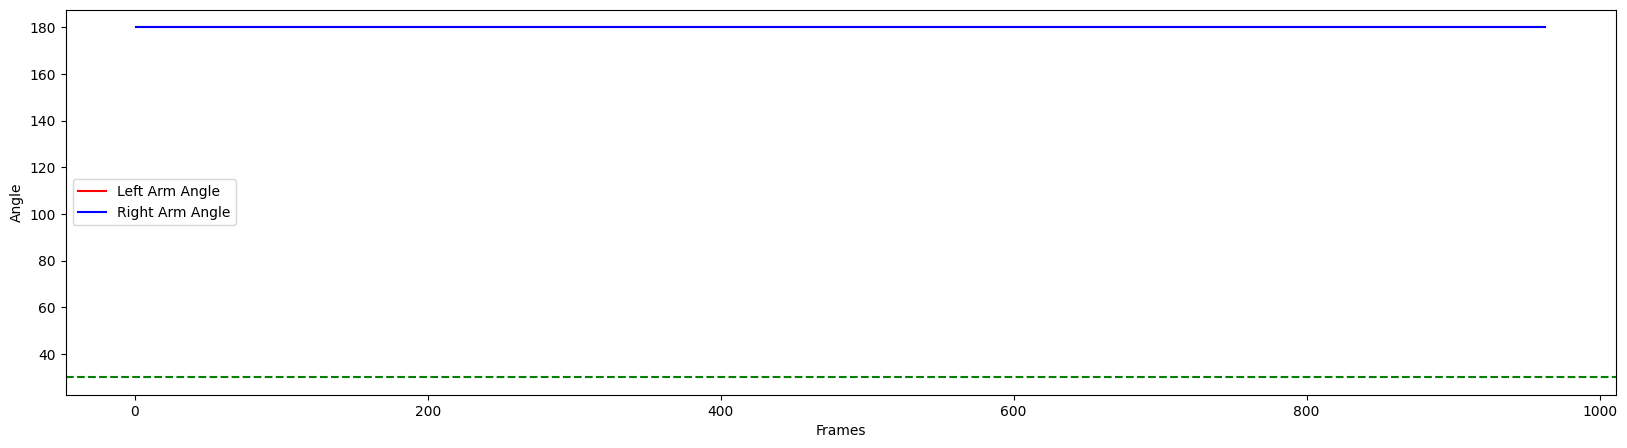

In [12]:
# initialise variables
counter = 0
state = 'Down'
range_flag = True
halfway = False
feedback = ''
frame_count = 0
# Plotting variables
frames = []
left_angle = []
right_angle = []
body_angles = []

# Prompt user input for exercise selection
while True:
    try:
        user_choice = int(input('Which exercise would you like to do? Please enter 1, 2 or 3.\n1. Squat \n2. Arm Curl \n3. Sit-up\n'))
        print("")
        if user_choice in [1, 2, 3]:
            print('Please wait a moment...')
            print('Click on the new window when it appears.\n')
            print('--------------------------------------------------------------------------------------\n')
            break
        else:
            print("Please enter either integer 1, 2 or 3")
            print("")
    except:
        print("Please enter either integer 1, 2 or 3")
        print("")

# Open webcam
feed = cv2.VideoCapture(0)
# Get user's maximum resolution
WIDTH = 10000
HEIGHT = 10000
feed.set(cv2.CAP_PROP_FRAME_WIDTH, WIDTH)
feed.set(cv2.CAP_PROP_FRAME_HEIGHT, HEIGHT)
width = int(feed.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(feed.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Mediapipe Pose model instance
with mp_pose.Pose(min_detection_confidence=50, min_tracking_confidence=50) as pose:
    while feed.isOpened():
        ret, frame = feed.read()
        frame_count += 1
        frames.append(frame_count)
        # Mirror frame
        frame = cv2.flip(frame, 1)
        # Recolor image from BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Pose detection
        detection = pose.process(image)
        # Recolor image from RGB back to BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = True

        # Render detections
        mp_drawing.draw_landmarks(image, detection.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))
        
        # Recognise particular exercise based on user input
        if user_choice == 1:
            recognise_squat(detection)
        elif user_choice == 2:
            recognise_curl(detection)
        else:
            recognise_situp(detection)
        # Status box setup
        cv2.rectangle(image, (0,0), (width, int(height*0.1)), (245,117,16), -1)
        cv2.putText(image, "REPS:", (int(width*0.01), int(height*0.025)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA) # font, size, color, line width, line type
        
        cv2.putText(image, "STATE:", (int(width*0.1), int(height*0.025)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        
        cv2.putText(image, "FEEDBACK:", (int(width*0.2), int(height*0.025)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        
        cv2.putText(image, str(counter), (int(width*0.01), int(height*0.08)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.putText(image, state, (int(width*0.1), int(height*0.08)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.putText(image, feedback, (int(width*0.2), int(height*0.08)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
        window_name = 'Exercise Counter'
        
        cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
        cv2.imshow(window_name, image)
        
        # quit webcam
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cv2.destroyAllWindows()
cv2.waitKey(1)
feed.release()

plot_viz(user_choice)
print('\nThe red/blue lines show the angle of your targetted body part throughout your exercise,') 
print('whereas the green dotted line is the minimum angle required for the exercise to be recorded as one repetition.')

In [11]:
import matplotlib.pyplot as plt

In [14]:
import math

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    radians = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle = abs(math.degrees(radians))
    if angle > 180:
        angle = 360 - angle
    return angle

# Function to provide feedback based on angle
def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

# Define threshold for arm curls
arm_curl_threshold = (20, 160)  # Example threshold for arm curls

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Capture video from webcam
cap = cv2.VideoCapture(0)

correct_counter = 0
incorrect_counter = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the image to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect poses in the frame
    results = pose.process(frame_rgb)

    if results.pose_landmarks:
        # Extract landmark points for relevant joints
        landmarks = results.pose_landmarks.landmark
        # Example: For arm curls
        shoulder = (landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)
        elbow = (landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y)
        wrist = (landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y)
        # Calculate the angle at the elbow
        angle_arm_curl = calculate_angle(shoulder, elbow, wrist)

        # Provide feedback based on the angle
        feedback = provide_feedback(angle_arm_curl, arm_curl_threshold)

        # Display feedback on frame
        cv2.putText(frame, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        # Increment counters based on the angle
        if arm_curl_threshold[0] <= angle_arm_curl <= arm_curl_threshold[1]:
            correct_counter += 1
        else:
            incorrect_counter += 1

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )   

        # Display counters on frame
        cv2.putText(frame, f"Correct Count: {correct_counter}", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.putText(frame, f"Incorrect Count: {incorrect_counter}", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Display the frame
    cv2.imshow('Virtual Gym Trainer', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()


In [24]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

def check_counter(angle):
    global correct_counter
    global incorrect_counter
    if arm_curl_threshold[0] <= angle_arm_curl <= arm_curl_threshold[1]:
            correct_counter += 1
    else:
        incorrect_counter += 1
    return correct_counter,incorrect_counter



arm_curl_threshold = (20, 160)
correct_counter = 0
incorrect_counter = 0

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
             # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            feedback = provide_feedback(angle, arm_curl_threshold)

            correct,incorrect=check_counter(angle)
            
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.putText(image, f"Correct Count: {correct}", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.putText(image, f"Incorrect Count: {incorrect}", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
          
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [26]:
mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

cap = cv2.VideoCapture(0)
up = False
counter = 0

while True:
    success, img = cap.read()
    img = cv2.resize(img, (1280,720))
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    # print(results.pose_landmarks)
    # print("-----------------------------------------------------")
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        points = {}
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h,w,c = img.shape
            cx, cy = int(lm.x*w), int(lm.y*h)
            # print(id,lm,cx,cy)
            points[id] = (cx,cy)


        cv2.circle(img, points[12], 15, (255,0,0), cv2.FILLED)
        cv2.circle(img, points[14], 15, (255,0,0), cv2.FILLED)
        cv2.circle(img, points[11], 15, (255,0,0), cv2.FILLED)
        cv2.circle(img, points[13], 15, (255,0,0), cv2.FILLED)


        if not up and points[14][1] + 40 < points[12][1]:
            print("UP")
            up = True
            counter += 1
        elif points[14][1] > points[12][1]:
            print("Down")
            up = False
        # print("----------------------",counter)

    cv2.putText(img, str(counter), (100,150),cv2.FONT_HERSHEY_PLAIN, 12, (255,0,0),12)


    cv2.imshow("img",img)
    cv2.waitKey(1)

Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
UP
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
UP
Down
Down

KeyboardInterrupt: 

In [27]:
cap.release()
cv2.destroyAllWindows()

In [32]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
             # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)

            if 30<angle<160:
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
          
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2


In [31]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

# def check_counter(angle):
#     global correct_counter
#     global incorrect_counter
#     if arm_curl_threshold[0] <= angle_arm_curl <= arm_curl_threshold[1]:
#             correct_counter += 1
#     else:
#         incorrect_counter += 1
#     return correct_counter,incorrect_counter



arm_curl_threshold = (20, 160)
correct_counter = 0
incorrect_counter = 0
counter = 0
up = False

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
             # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )

            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                
            feedback = provide_feedback(angle, arm_curl_threshold)
            
        
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        cv2.putText(image, f"Correct Count: {counter}", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.putText(image, f"Incorrect Count: {incorrect}", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
          
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [9]:
import cv2
import mediapipe as mp

mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

cap = cv2.VideoCapture(0)
up = False
counter = 0

while True:
    success, img = cap.read()
    img = cv2.resize(img, (1280,720))
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    # print(results.pose_landmarks)
    # print("-----------------------------------------------------")
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        points = {}
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h,w,c = img.shape
            cx, cy = int(lm.x*w), int(lm.y*h)
            # print(id,lm,cx,cy)
            points[id] = (cx,cy)


        cv2.circle(img, points[12], 15, (255,0,0), cv2.FILLED)
        cv2.circle(img, points[14], 15, (255,0,0), cv2.FILLED)
        cv2.circle(img, points[11], 15, (255,0,0), cv2.FILLED)
        cv2.circle(img, points[13], 15, (255,0,0), cv2.FILLED)


        if not up and points[14][1] + 40 < points[12][1]:
            print("UP")
            up = True
            counter += 1
        elif points[14][1] > points[12][1]:
            print("Down")
            up = False
        # print("----------------------",counter)

    cv2.putText(img, str(counter), (100,150),cv2.FONT_HERSHEY_PLAIN, 12, (255,0,0),12)










    cv2.imshow("img",img)
    cv2.waitKey(1)
    


Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
UP
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Down
Do

KeyboardInterrupt: 

In [10]:
cap.release()
cv2.destroyAllWindows()

In [11]:
import cv2
import mediapipe as mp
import math

def angle_between_points(a, b, c):
    """Calculate the angle between three points."""
    # Calculate vectors between the points
    ba = [a[0] - b[0], a[1] - b[1]]
    bc = [c[0] - b[0], c[1] - b[1]]
    
    # Calculate the dot product of the vectors
    dot_product = ba[0] * bc[0] + ba[1] * bc[1]
    
    # Calculate the magnitude (length) of the vectors
    magnitude_ba = math.sqrt(ba[0] ** 2 + ba[1] ** 2)
    magnitude_bc = math.sqrt(bc[0] ** 2 + bc[1] ** 2)
    
    # Calculate the cosine of the angle
    cosine_angle = dot_product / (magnitude_ba * magnitude_bc)
    
    # Calculate the angle in radians and convert it to degrees
    angle = math.acos(cosine_angle)
    angle_degrees = math.degrees(angle)
    
    return angle_degrees

mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

cap = cv2.VideoCapture(0)
left_up = False
right_up = False
left_counter = 0
right_counter = 0

while True:
    success, img = cap.read()
    if not success or img is None:  # Check if the frame is empty
        print("Error reading frame. Exiting...")
        break  # Exit the loop if frame is empty
    img = cv2.resize(img, (1280,720))
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        points = {}
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h,w,c = img.shape
            cx, cy = int(lm.x*w), int(lm.y*h)
            points[id] = (cx,cy)

        left_angle = angle_between_points(points[11], points[13], points[15])
        right_angle = angle_between_points(points[12], points[14], points[16])
        
        if left_angle < 90:
            print("Left UP")
            left_up = True
            left_counter += 1
        elif left_angle > 120:
            print("Left Down")
            left_up = False
            
        if right_angle < 90:
            print("Right UP")
            right_up = True
            right_counter += 1
        elif right_angle > 120:
            print("Right Down")
            right_up = False

    cv2.putText(img, f"Left: {left_counter}", (100,150),cv2.FONT_HERSHEY_PLAIN, 2, (255,0,0),2)
    cv2.putText(img, f"Right: {right_counter}", (100,200),cv2.FONT_HERSHEY_PLAIN, 2, (255,0,0),2)
    cv2.imshow("img",img)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Exit loop if 'q' is pressed
        break

cap.release()
cv2.destroyAllWindows()


Left UP
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left UP
Right UP
Left UP
Right UP
Left UP
Right UP
Left Down
Right UP
Left Down
Right UP
Left UP
Right UP
Left UP
Right UP
Left UP
Right UP
Left UP
Right UP
Left UP
Right UP
Left UP
Right UP
Left UP
Right UP
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left UP
Right UP
Left UP
Right UP
Left UP
Right UP
Left Down
Right UP
Left UP
Right UP
Left Down
Right UP
Left UP
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left Down
Right UP
Left UP
Right Down
Left UP
Left Down
Left Down
Left Down
Right Down
Left Down
Right Down
Left Down
Right Down
Left Down
Left Down
Right UP
Left Down
Left Down
Right UP
Left Down
Right UP
Right UP
Right UP
L

In [13]:
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [5]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [19]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback



arm_curl_threshold = (20, 160)
correct_counter = 0
incorrect_counter = 0
counter = 0
up = False

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
             # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )

            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                
            feedback = provide_feedback(angle, arm_curl_threshold)

        
            
        
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5


In [8]:
cap.release()
cv2.destroyAllWindows()

In [8]:
def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback


### all were good except feed back and after some achieved the some sort of conditined result

In [20]:
import cv2
import mediapipe as mp

# Curl counter variables
counter = 0
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

# Set arm curl angle thresholds
arm_curl_threshold = (30, 160)
# Initialize correct and incorrect counters
correct_counter = 0
incorrect_counter = 0

# Setup MediaPipe Pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0,255), 2, cv2.LINE_AA)

            feedback = provide_feedback(angle, arm_curl_threshold)

            previous_stage = stage

            # Curl counter logic
            if angle > 150 and angle < 160:
                stage = "down"
                previous_stage = stage
            elif angle > 30 and stage == 'down' and angle < 50:
                stage = "up"
                prev_stage = stage
                # Check if angle was within range during both up and down phases
                if angle >= arm_curl_threshold[0] and angle <= arm_curl_threshold[1] and feedback=="Angle within range. Good job!" and stage=="up":
                    # previous_stage=stage
                    counter += 1
                    correct_counter += 1
                    print(f"Rep {counter}: Correct")
                    previous_stage=stage

                elif prev_stage == "up" and feedback=="Angle too small. Extend your arm further.":
                    prev_stage="down"
                    incorrect_counter += 1
                    print(f"Rep {counter}: Incorrect (angle below threshold)")
                # else:
                #     if feedback!="Angle within range. Good job!":
                #         incorrect_counter += 1
                #         print(f"Rep {counter}: Incorrect (angle out of range)")
            if stage == "down"  and angle > arm_curl_threshold[1]:
                stage = "up"
                incorrect_counter += 1
                print(f"Rep {counter}: Incorrect (angle above threshold)")
                
            if prev_stage == "up"  and angle < arm_curl_threshold[0]:
                prev_stage = "down"
                incorrect_counter += 1
                print(f"Rep {counter}: Incorrect (angle below threshold)")

            
            

            # Render curl counter, status box, rep data, stage data, and detections
            # (code remains largely the same as in the original responses)

        except:
            pass

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        # cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Print final counts
    print(f"Correct reps: {correct_counter}")
    print(f"Incorrect reps: {incorrect_counter}")
    print(f"Total reps: {counter}")


Correct reps: 0
Incorrect reps: 0
Total reps: 0


In [19]:
cap.release()
cv2.destroyAllWindows()

In [29]:
import cv2
import mediapipe as mp

# Curl counter variables
counter = 0
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

# Set arm curl angle thresholds
arm_curl_threshold = (20, 160)
# Initialize correct and incorrect counters
correct_counter = 0
incorrect_counter = 0

# Setup MediaPipe Pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            feedback = provide_feedback(angle, arm_curl_threshold)

            # Curl counter logic
            if angle > 160:
                stage = "down"
            elif angle < 30 and stage == 'down':
                stage = "up"
                # Check if angle was within range during EITHER the "up" or "down" phase
                if (angle >= arm_curl_threshold[0] and angle <= arm_curl_threshold[1]) or \
                  (stage == "up" and angle < arm_curl_threshold[0]):
                    counter += 1
                    if stage == "up" and angle < arm_curl_threshold[0]:
                        correct_counter += 1
                        print(f"Rep {counter}: Correct (caught under-extension)")
                    else:
                        correct_counter += 1
                        print(f"Rep {counter}: Correct")
                else:
                    incorrect_counter += 1
                    print(f"Rep {counter}: Incorrect (angle out of range)")

            # Render curl counter, status box, rep data, stage data, and detections
            # (code remains largely the same as in the original responses)

        except:
            pass

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Print final counts
    print(f"Correct reps: {correct_counter}")
    print(f"Incorrect reps: {incorrect_counter}")
    print(f"Total reps: {counter}")


Rep 1: Correct
Rep 2: Correct
Rep 3: Correct
Rep 4: Correct
Rep 5: Correct
Rep 6: Correct
Rep 7: Correct
Correct reps: 7
Incorrect reps: 0
Total reps: 7


In [31]:
import cv2
import mediapipe as mp

# Curl counter variables
counter = 0
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more (but still count)."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

# Set arm curl angle thresholds
arm_curl_threshold = (20, 160)
# Initialize correct and incorrect counters
correct_counter = 0
incorrect_counter = 0

# Setup MediaPipe Pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            feedback = provide_feedback(angle, arm_curl_threshold)

            # Curl counter logic
            if angle > 160:
                stage = "down"
            elif angle < 30 and stage == 'down':
                stage = "up"
                # Check if angle was within range during EITHER the "up" or "down" phase
                if (angle >= arm_curl_threshold[0] and angle <= arm_curl_threshold[1]) or \
                  (stage == "up" and angle < arm_curl_threshold[0]):
                    counter += 1
                    if stage == "up" and angle < arm_curl_threshold[0]:
                        correct_counter += 1
                        print(f"Rep {counter}: Correct (caught under-extension)")
                    else:
                        correct_counter += 1
                        print(f"Rep {counter}: Correct")
                else:
                    # Increment incorrect counter only if angle is above upper threshold
                    if angle > arm_curl_threshold[1]:
                        incorrect_counter += 1
                        print(f"Rep {counter}: Incorrect (angle above threshold)")

            # Render curl counter, status box, rep data, stage data, and detections
            # (code remains largely the same as in the original responses)

        except:
            pass

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Print final counts
    print(f"Correct reps: {correct_counter}")
    print(f"Incorrect reps: {incorrect_counter}")
    print(f"Total reps: {counter}")


Rep 1: Correct
Rep 2: Correct
Rep 3: Correct
Rep 4: Correct
Correct reps: 4
Incorrect reps: 0
Total reps: 4


In [15]:
import cv2
import mediapipe as mp

# Curl counter variables
counter = 0
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more (but still count)."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

# Set arm curl angle thresholds
arm_curl_threshold = (20, 160)
# Initialize correct and incorrect counters
correct_counter = 0
incorrect_counter = 0

# Setup MediaPipe Pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            feedback = provide_feedback(angle, arm_curl_threshold)

            # Curl counter logic
            previous_stage = stage

            if angle > 160:
                stage = "down"
            elif angle < 30 and stage == 'down':
                stage = "up"

            # Check if angle transitions within expected ranges during up and down motions
            if stage == "up" and previous_stage == "down" and angle >= arm_curl_threshold[0] and angle <= arm_curl_threshold[1]:
                counter += 1
                correct_counter += 1
                print(f"Rep {counter}: Correct")
            elif stage == "down" and previous_stage == "up" and angle > arm_curl_threshold[1]:
                incorrect_counter += 1
                print(f"Rep {counter}: Incorrect (angle above threshold)")

            elif stage == "up" and previous_stage =="down" and angle < arm_curl_threshold[0]:
                incorrect_counter += 1
                print(f"Rep {counter}: Incorrect (angle below threshold)")

            # Render curl counter, status box, rep data, stage data, and detections
            # (code remains largely the same as in the original responses)

        except:
            pass

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Print final counts
    print(f"Correct reps: {correct_counter}")
    print(f"Incorrect reps: {incorrect_counter}")
    print(f"Total reps: {counter}")


NameError: name 'feedback' is not defined

### some what better but no incorrect count and incorrect indications

In [45]:

import cv2
import mediapipe as mp

# Curl counter variables
counter = 0
stage = None

def provide_feedback(angle, threshold):
    feedback = ""
    if angle < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle > threshold[1]:
        feedback = "Angle too large. Bend your arm more."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

# Set arm curl angle thresholds
arm_curl_threshold = (30, 160)
# Initialize correct and incorrect counters
correct_counter = 0
incorrect_counter = 0

# Setup MediaPipe Pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)

            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            feedback = provide_feedback(angle, arm_curl_threshold)

            previous_stage = stage

            # Curl counter logic
            if angle > 150 and angle < 160:
                stage = "down"
                previous_stage = stage
            elif angle > 30 and stage == 'down' and angle < 50:
                stage = "up"
                # Check if angle was within range during both up and down phases
                if angle >= arm_curl_threshold[0] and angle <= arm_curl_threshold[1] and feedback=="Angle within range. Good job!" and stage=="up" and previous_stage=="down":
                    # previous_stage=stage
                    counter += 1
                    correct_counter += 1
                    print(f"Rep {counter}: Correct")
                    previous_stage=stage

                elif stage == "up" and previous_stage =="down" and angle < arm_curl_threshold[0]:
                    incorrect_counter += 1
                    print(f"Rep {counter}: Incorrect (angle below threshold)")
                # else:
                #     if feedback!="Angle within range. Good job!":
                #         incorrect_counter += 1
                #         print(f"Rep {counter}: Incorrect (angle out of range)")
            # if stage == "down"  and angle > arm_curl_threshold[1]:
            #     stage = "up"
            #     incorrect_counter += 1
            #     print(f"Rep {counter}: Incorrect (angle above threshold)")
                
            # if stage == "up"  and angle < arm_curl_threshold[0]:
            #     stage = "down"
            #     incorrect_counter += 1
            #     print(f"Rep {counter}: Incorrect (angle below threshold)")

            
            

            # Render curl counter, status box, rep data, stage data, and detections
            # (code remains largely the same as in the original responses)

        except:
            pass

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        # Display feedback on frame
        cv2.putText(image, feedback, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

    # Print final counts
    print(f"Correct reps: {correct_counter}")
    print(f"Incorrect reps: {incorrect_counter}")
    print(f"Total reps: {counter}")


Rep 1: Correct
Rep 2: Correct
Rep 3: Correct
Rep 4: Correct
Correct reps: 4
Incorrect reps: 0
Total reps: 4


### standing overhead dumbell press exercise

In [1]:
import cv2
import mediapipe as mp

In [8]:
import math
import numpy as np

def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

def sholder_calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
        
    return angle

# Function to check if body posture is straight
def is_straight(angles, threshold=10):
    for angle in angles:
        if angle > threshold:
            return False
    return True

# Main function
def main():
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose

    # Initialize MediaPipe Pose model
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        cap = cv2.VideoCapture(0)
        count_correct = 0
        count_incorrect = 0

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Flip the frame horizontally for a later selfie-view display
            

            # Convert the BGR image to RGB
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the image and detect pose landmarks
            results = pose.process(image)

            if results.pose_landmarks:
                landmarks = results.pose_landmarks.landmark
                # Extract key points of interest for Standing overhead dumbbell press exercise

                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                          landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]


                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]


                
             

                # Calculate angles
                left_shoulder_angle = sholder_calculate_angle(right_shoulder, left_shoulder, left_elbow)
                right_shoulder_angle = sholder_calculate_angle(left_shoulder, right_shoulder, right_elbow)
                left_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
                right_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)

                # Check if body posture is straight
                body_angles = [left_angle, right_angle]
                if is_straight(body_angles):
                    count_correct += 1
                else:
                    count_incorrect += 1


                # Display count information
                cv2.putText(frame, f"Left Shoulder Angle: {left_shoulder_angle:.2f}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(frame, f"Right Shoulder Angle: {right_shoulder_angle:.2f}", (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(frame, f"Left Elbow Angle: {left_angle:.2f}", (50, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(frame, f"Right Elbow Angle: {right_angle:.2f}", (50, 140), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                
            # Render detections
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Display frame
            cv2.imshow('Standing Overhead Dumbbell Press Exercise Monitor', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


### Push up exercise

In [3]:
import cv2
import numpy as np
import cvzone
from cvzone.PoseModule import PoseDetector
import math

In [2]:
!pip install cvzone

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26307 sha256=138f30faeb5955d3143001ad85a485535f147b9e3c7a96b84e84f3fe7a86fc44
  Stored in directory: c:\users\k.vidya\appdata\local\pip\cache\wheels\fe\42\84\8292443575ee9f8b82bfa0678160feef87a598d61964a94650
Successfully built cvzone


In [24]:
def angles(lmlist,p1,p2,p3,p4,p5,p6,drawpoints):
        global counter
        global direction

        if len(lmlist)!= 0:
            point1 = lmlist[p1]
            point2 = lmlist[p2]
            point3 = lmlist[p3]
            point4 = lmlist[p4]
            point5 = lmlist[p5]
            point6 = lmlist[p6]

            print(point1)

            x1,y1 = point1[1:3]
            x2, y2 = point2[1:3]
            x3, y3 = point3[1:3]
            x4, y4 = point4[1:3]
            x5, y5 = point5[1:3]
            x6, y6 = point6[1:3]

            if drawpoints == True:
                cv2.circle(img,(x1,y1),10,(255,0,255),5)
                cv2.circle(img, (x1, y1), 15, (0,255, 0),5)
                cv2.circle(img, (x2, y2), 10, (255, 0, 255), 5)
                cv2.circle(img, (x2, y2), 15, (0, 255, 0), 5)
                cv2.circle(img, (x3, y3), 10, (255, 0, 255), 5)
                cv2.circle(img, (x3, y3), 15, (0, 255, 0), 5)
                cv2.circle(img, (x4, y4), 10, (255, 0, 255), 5)
                cv2.circle(img, (x4, y4), 15, (0, 255, 0), 5)
                cv2.circle(img, (x5, y5), 10, (255, 0, 255), 5)
                cv2.circle(img, (x5, y5), 15, (0, 255, 0), 5)
                cv2.circle(img, (x6, y6), 10, (255, 0, 255), 5)
                cv2.circle(img, (x6, y6), 15, (0, 255, 0), 5)

                cv2.line(img,(x1,y1),(x2,y2),(0,0,255),6)
                cv2.line(img, (x2,y2), (x3, y3), (0, 0, 255), 6)
                cv2.line(img, (x4, y4), (x5, y5), (0, 0, 255), 6)
                cv2.line(img, (x5, y5), (x6, y6), (0, 0, 255), 6)
                cv2.line(img, (x1, y1), (x4, y4), (0, 0, 255), 6)

            lefthandangle = math.degrees(math.atan2(y3 - y2, x3 - x2) -
                                         math.atan2(y1 - y2, x1 - x2))

            righthandangle = math.degrees(math.atan2(y6 - y5, x6 - x5) -
                                          math.atan2(y4 - y5, x4 - x5))

            # print(lefthandangle,righthandangle)

            leftHandAngle = int(np.interp(lefthandangle, [-30, 180], [100, 0]))
            rightHandAngle = int(np.interp(righthandangle, [34, 173], [100, 0]))

            left, right = leftHandAngle, rightHandAngle

            return left, right

            


In [20]:
counter = 0
direction = 0

cap = cv2.VideoCapture(0)
pd = PoseDetector(trackCon=0.70,detectionCon=0.70)

while cap.isOpened():
    ret,img = cap.read()
    if not ret:
        break

    img = cv2.resize(img,(1000,500))
    cvzone.putTextRect(img,'AI Push Up Counter',[345,30],thickness=2,border=2,scale=2.5)
    pd.findPose(img,draw=0)
    lmlist ,bbox = pd.findPosition(img ,draw=0,bboxWithHands=0)


    left,right = angles(lmlist,11,13,15,12,14,16,drawpoints=True)

    if left >= 70 and right >= 70:
        if direction == 0:
            counter += 0.5
            direction = 1
    if left <= 70 and right <= 70:
        if direction == 1:
            counter += 0.5
            direction = 0

    cv2.rectangle(img, (0, 0), (120, 120), (255, 0, 0), -1)
    cv2.putText(img, str(int(counter)), (20, 70), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.6, (0, 0, 255), 7)

    leftval  = np.interp(right,[0,100],[400,200])
    rightval = np.interp(right, [0, 100], [400, 200])

    cv2.putText(img,'R', (24, 195), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 7)
    cv2.rectangle(img,(8,200),(50,400),(0,255,0),5)
    cv2.rectangle(img, (8, int(rightval)), (50, 400), (255,0, 0), -1)

    cv2.putText(img, 'L', (962, 195), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 7)
    cv2.rectangle(img, (952, 200), (995, 400), (0, 255, 0), 5)
    cv2.rectangle(img, (952, int(leftval)), (995, 400), (255, 0, 0), -1)


    if left > 70:
        cv2.rectangle(img, (952, int(leftval)), (995, 400), (0, 0, 255), -1)

    if right > 70:
        cv2.rectangle(img, (8, int(leftval)), (50, 400), (0, 0, 255), -1)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    cap.release()
    cv2.destroyAllWindows()



cv2.imshow('frame',img)
cv2.waitKey(1)

NameError: name 'PoseDetector' is not defined

In [22]:
import numpy as np

In [5]:
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
def calc_angle(x, y, z):
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    radians = np.arctan2(z[1]-y[1], z[0]-y[0]) - np.arctan2(x[1]-y[1], x[0]-y[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle


    # print(angle)

    return angle

In [14]:
def provide_feedback(angle1,angle2,threshold):
    feedback = ""
    if angle1 < threshold[0] and angle2 < threshold[0]:
        feedback = "Angle too small. Extend your arm further."
    elif angle1 > threshold[1] and angle2 > threshold[1]:
        feedback = "Angle too large. Bend your arm more (but still count)."
    else:
        feedback = "Angle within range. Good job!"
    return feedback

In [19]:
def provide_feedback_hip(angle1,angle2):
    feedback = ""
    if angle1 < 165 and angle2 < 165:
        feedback = "Angle too small. Extend your arm further for hip."
    elif angle1 > 180 and angle2 > 180:
        feedback = "Angle too large. Bend your arm more (but still count) for hip."
    else:
        feedback = "Angle within range. Good job for hip!"
    return feedback

In [28]:
counter = 0
incorrect_counter = 0
correct_counter = 0
direction = 0
stage=None

arm_curl_threshold = (30,180)
# Setup MediaPipe Pose instance
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]


            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                           landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            
            
            left_elbow_y = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y
            # print("left y",left_elbow_y)
            
            right_elbow_y = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y
            # print("left y",right_elbow_y)
            
            nose = landmarks[mp_pose.PoseLandmark.NOSE].y

            # print(nose)

            left_foot_index = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,
                                 landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]

            right_foot_index = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y]

            # print(left_foot_index)
            # print(right_foot_index)

            height, width = image.shape[:2]

            # print(height)
            # print(width)


            start_point = (int(right_foot_index[0] * width), int(right_foot_index[1] * height))
            end_point = (int(left_foot_index[0] * width), int(left_foot_index[1] * height))

            # print(start_point)
            # print(end_point)



            # print(left_shoulder)

            # Calculate angle
            left_hip_angle = calc_angle(left_shoulder,left_hip,left_knee)
            right_hip_angle = calc_angle(right_shoulder,right_hip,right_knee)
            # print(left_hip_angle)
            # print(right_hip_angle)
            left_angle = calc_angle(left_shoulder, left_elbow, left_wrist)
            right_angle = calc_angle(right_shoulder, right_elbow, right_wrist)

            # print(left_hip_nagle)
            # print(left_angle)

            # print("left angle: ",left_angle)
            # print("right angle: ",right_angle)
            # leftHandAngle = int(np.interp(lefthandangle, [-30, 180], [100, 0]))
            # rightHandAngle = int(np.interp(righthandangle, [34, 173], [100, 0]))

            left, right = left_angle, right_angle

            feedback = provide_feedback(left,right,arm_curl_threshold)
            feedback2 = provide_feedback_hip(left_hip_angle,right_hip_angle)
            # print(feedback)

            if left_angle > 30 and left_angle < 50 and right_angle > 30 and right_angle < 50:
                stage = "up"
                previous_stage = stage
            elif left_angle > 165 and left_angle < 180 and right_angle > 165 and right_angle < 180 and stage=="up":
                stage = "down"
                previous_stage = stage
                if left_angle >= 30 and left_angle <= 180 and right_angle >= 30 and right_angle <= 180 and stage=="down" and feedback=="Angle within range. Good job!":
                    if left_hip_angle > 165 and left_hip_angle < 180 and right_hip_angle > 165 and right_hip_angle < 180:
                        counter += 1
                        correct_counter += 1
                        print(counter)
                        previous_stage=stage
                    else:
                        dis = "straight your body"
                        incorrect_count += 1
                        print(incorrect_count,"--")
                        stage = "up"
                        print(dis)
                elif prev_stage == "down" and feedback=="Angle too small. Extend your arm further.":
                    prev_stage="up"
                    incorrect_counter += 1
                    # print(f"Rep {counter}: Incorrect (angle below threshold)")
            
            if stage == "down"  and angle > 180:
                stage = "up"
                incorrect_counter += 1
                # print(f"Rep {counter}: Incorrect (angle above threshold)")
            
            if prev_stage == "up"  and angle < 30:
                prev_stage = "down"
                incorrect_counter += 1
                # print(f"Rep {counter}: Incorrect (angle below threshold)")


        except:
            pass

        print(counter,"-")
        print(correct_counter,"--")
        print(incorrect_counter,"---")

        cv2.rectangle(image, (0, 0), (120, 120), (255, 0, 0), -1)
        cv2.putText(image, str(int(counter)), (20, 70), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.6, (0, 0, 255), 7)

        cv2.putText(image, str(int(incorrect_counter)), (20, 400), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.6, (0, 0, 255), 7)

        cv2.putText(image,str(int(left_angle)), (24, 195), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)
        cv2.putText(image,str(int(right_angle)), (24, 155), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)


        cv2.putText(image,str(int(left_hip_angle)), (24, 125), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)
        cv2.putText(image,str(int(right_hip_angle)), (24, 95), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)

        cv2.putText(image, str(feedback), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

        cv2.putText(image, str(feedback2), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2, cv2.LINE_AA)
        

        # cv2.line(image, start_point, end_point,(255,255,0), 2) 
    
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) )               
       
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



#### checking the x-axis for shoulder and wrists

0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
0 -
0 --
0 ---
1
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
1 -
1 --
0 ---
2
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
2 -
2 --
0 ---
3
3 -
3 --
0 ---
3 -
3 --
0 ---
3 -
3 --
0 ---
3 -
3 --
0 ---
3 -
3 --
0 ---
3 -


In [ ]:
if angle > 150 and angle < 160:
    stage = "down"
    previous_stage = stage
elif angle > 30 and stage == 'down' and angle < 50:
    stage = "up"
    prev_stage = stage
    # Check if angle was within range during both up and down phases
    if angle >= arm_curl_threshold[0] and angle <= arm_curl_threshold[1] and feedback=="Angle within range. Good job!" and stage=="up":
        # previous_stage=stage
        counter += 1
        correct_counter += 1
        print(f"Rep {counter}: Correct")
        previous_stage=stage

    elif prev_stage == "up" and feedback=="Angle too small. Extend your arm further.":
        prev_stage="down"
        incorrect_counter += 1
        print(f"Rep {counter}: Incorrect (angle below threshold)")
    # else:
    #     if feedback!="Angle within range. Good job!":
    #         incorrect_counter += 1
    #         print(f"Rep {counter}: Incorrect (angle out of range)")
if stage == "down"  and angle > arm_curl_threshold[1]:
    stage = "up"
    incorrect_counter += 1
    print(f"Rep {counter}: Incorrect (angle above threshold)")
    
if prev_stage == "up"  and angle < arm_curl_threshold[0]:
    prev_stage = "down"
    incorrect_counter += 1
    print(f"Rep {counter}: Incorrect (angle below threshold)")

In [ ]:
if left_angle > 165 and left_angle > 180 and right_angle > 165 and right_angle < 180:
    stage = "down"
    previous_stage = stage
elif left_angle > 30 and left_angle < 50 and right_angle > 30 and right_angle < 50:
    stage = "up"
    if left_angle >= 30 and left_angle <= 180 and right_angle >= 30 and right_angle <= 180 and stage=="up" and feedback=="Angle within range. Good job!":
        if left_hip_angle > 165 and left_hip_angle < 180 and right_hip_angle > 165 and right_hip_angle < 180:
            counter += 1
            correct_counter += 1
            print(f"Rep {counter}: Correct")
            previous_stage=stage
        else:
            dis = "straight your body"
            incorrect_count += 1
            print(incorrect_count)
    elif prev_stage == "up" and feedback=="Angle too small. Extend your arm further.":
        prev_stage="down"
        incorrect_counter += 1
        print(f"Rep {counter}: Incorrect (angle below threshold)")

if stage == "down"  and angle > 180:
    stage = "up"
    incorrect_counter += 1
    print(f"Rep {counter}: Incorrect (angle above threshold)")

if prev_stage == "up"  and angle < 30:
    prev_stage = "down"
    incorrect_counter += 1
    print(f"Rep {counter}: Incorrect (angle below threshold)")




    
        

In [46]:
print("right_hip")
print([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y])
print("left_hip")
print([landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y])
print("right_knee")
print([landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y])
print("left_knee")
print([landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y])
print("left_shoulder")
print([landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y])

right_hip
[0.4701724946498871, 2.4222187995910645]
left_hip
[0.796902596950531, 2.4216651916503906]
right_knee
[0.3146086633205414, 2.1874759197235107]
left_knee
[0.7444421052932739, 2.232510566711426]
left_shoulder
[0.7517133951187134, 2.8056132793426514]


### the y position of nose and the shoulders are inversely related to the performed exercise
### for hands up and nose down  ---  left y 0.3733738362789154
###                                  left y 0.39301449060440063
###                                  0.5498459339141846

### for hands down and nose up  ---  left y 1.015901803970337
###                                  left y 1.0367357730865479
###                                  0.5350347757339478

In [42]:
import math

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    radians = math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0])
    angle = abs(radians * 180.0 / math.pi)
    return angle if angle <= 180 else 360 - angle

# Function to check if body posture is straight
def is_straight(key_points, threshold=10):
    angles = []
    # Calculate angles for ankles, knees, hips, shoulders, and head
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.LEFT_ANKLE], 
                                  key_points[mp_pose.PoseLandmark.LEFT_KNEE], 
                                  key_points[mp_pose.PoseLandmark.LEFT_HIP]))
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.RIGHT_ANKLE], 
                                  key_points[mp_pose.PoseLandmark.RIGHT_KNEE], 
                                  key_points[mp_pose.PoseLandmark.RIGHT_HIP]))
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.LEFT_KNEE], 
                                  key_points[mp_pose.PoseLandmark.LEFT_HIP], 
                                  key_points[mp_pose.PoseLandmark.RIGHT_HIP]))
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.RIGHT_KNEE], 
                                  key_points[mp_pose.PoseLandmark.RIGHT_HIP], 
                                  key_points[mp_pose.PoseLandmark.LEFT_HIP]))
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.LEFT_HIP], 
                                  key_points[mp_pose.PoseLandmark.RIGHT_HIP], 
                                  key_points[mp_pose.PoseLandmark.LEFT_SHOULDER]))
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.RIGHT_HIP], 
                                  key_points[mp_pose.PoseLandmark.LEFT_HIP], 
                                  key_points[mp_pose.PoseLandmark.RIGHT_SHOULDER]))
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.LEFT_SHOULDER], 
                                  key_points[mp_pose.PoseLandmark.RIGHT_SHOULDER], 
                                  key_points[mp_pose.PoseLandmark.NOSE]))
    angles.append(calculate_angle(key_points[mp_pose.PoseLandmark.RIGHT_SHOULDER], 
                                  key_points[mp_pose.PoseLandmark.LEFT_SHOULDER], 
                                  key_points[mp_pose.PoseLandmark.NOSE]))
    # Check if all angles are within the threshold
    for angle in angles:
        if angle > threshold:
            return False
    return True

# Main function
def main():
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose

    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        cap = cv2.VideoCapture(0)

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.flip(frame, 1)
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(image)

            if results.pose_landmarks:
                key_points = {}
                for idx, lm in enumerate(results.pose_landmarks.landmark):
                    h, w, _ = frame.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    key_points[idx] = (cx, cy)

                if is_straight(key_points):
                    cv2.putText(frame, "Body is straight", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                else:
                    cv2.putText(frame, "Body is not straight", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            cv2.imshow('Body Straightness Detection', frame)

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


In [19]:
cap.release()
cv2.destroyAllWindows()

In [78]:
counter_correct = 0
counter_incorrect = 0
exercise_state = 'idle'
direction = 0
# Setup MediaPipe Pose instance
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                      landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                     landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]


            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            
            
            left_elbow_y = landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y
            # print("left y",left_elbow_y)
            
            right_elbow_y = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y
            # print("left y",right_elbow_y)
            
            nose = landmarks[mp_pose.PoseLandmark.NOSE].y

            # print(nose)

            left_foot_index = [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]

            right_foot_index = [landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX.value].y]

            # print(left_foot_index)
            # print(right_foot_index)

            height, width = image.shape[:2]

            # print(height)
            # print(width)


            start_point = (int(right_foot_index[0] * width), int(right_foot_index[1] * height))
            end_point = (int(left_foot_index[0] * width), int(left_foot_index[1] * height))

            # print(start_point)
            # print(end_point)



            # print(left_shoulder)

            # Calculate angle
            left_hip_angle = calc_angle(left_shoulder,left_hip,left_knee)
            right_hip_angle = calc_angle(right_shoulder,right_hip,right_knee)
            # print(left_hip_angle)
            # print(right_hip_angle)
            left_angle = calc_angle(left_shoulder, left_elbow, left_wrist)
            right_angle = calc_angle(right_shoulder, right_elbow, right_wrist)

            # print(left_hip_nagle)
            # print(left_angle)

            # print("left angle: ",left_angle)
            # print("right angle: ",right_angle)
            # leftHandAngle = int(np.interp(lefthandangle, [-30, 180], [100, 0]))
            # rightHandAngle = int(np.interp(righthandangle, [34, 173], [100, 0]))

            left, right = left_angle, right_angle

            if (left_angle > 30 and left_angle < 50 and right_angle > 30 and right_angle < 50) \
               and (left_hip_angle > 165 and left_hip_angle < 180 and right_hip_angle > 165 and right_hip_angle < 180):
                exercise_state = 'down'
            elif (left_angle > 165 and left_angle < 180 and right_angle > 165 and right_angle < 180) \
               and (left_hip_angle > 165 and left_hip_angle < 180 and right_hip_angle > 165 and right_hip_angle < 180):
                exercise_state = 'up'
    
            # Check current state and angles for counting:
            if exercise_state == 'down':
                if (not (left_angle > 30 and left_angle < 50) and not (right_angle > 30 and right_angle < 50)):
                    exercise_state = "up"
                    if left_hip_angle > 165 and left_hip_angle < 180 and right_hip_angle > 165 and right_hip_angle < 180:
                        # Correct hip angles, count correct rep
                        direction = 1
                        counter += 0.5
                    else:
                        # Incorrect hip angles, count incorrect rep
                        incorrect_counter += 1
    
            elif exercise_state == 'up':
                if (not (left_angle > 165 and left_angle < 180) and not (right_angle > 165 and right_angle < 180)):
                    exercise_state = "down"
                    if left_hip_angle > 165 and left_hip_angle < 180 and right_hip_angle > 165 and right_hip_angle < 180:
                        # Correct hip angles, count correct rep
                        direction = 0
                        counter += 0.5
                    else:
                        # Incorrect hip angles, count incorrect rep
                        incorrect_counter += 1

            

        except:
            pass

        cv2.rectangle(image, (0, 0), (120, 120), (255, 0, 0), -1)
        cv2.putText(image, str(int(counter)), (20, 70), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.6, (0, 0, 255), 7)

        cv2.putText(image,str(int(left_angle)), (24, 195), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)
        cv2.putText(image,str(int(right_angle)), (24, 155), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)


        cv2.putText(image,str(int(left_hip_angle)), (24, 125), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)
        cv2.putText(image,str(int(right_hip_angle)), (24, 95), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)

        # cv2.line(image, start_point, end_point,(255,255,0), 2) 


        

    
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
       
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

print("Correct reps:", counter_correct)
print("Incorrect reps:", counter_incorrect)
print("Exercise state:", exercise_state)


Correct reps: 0
Incorrect reps: 0
Exercise state: up


In [8]:
def calc_angle(x, y, z):
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    radians = np.arctan2(z[1]-y[1], z[0]-y[0]) - np.arctan2(x[1]-y[1], x[0]-y[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle


    # print(angle)

    return angle

### wall sit

In [15]:
import time
# Setup MediaPipe Pose instance
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]

            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            
            right_heel = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
            
            left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,
                          landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
            
            
            # Calculate angle
            left_hip_angle = calc_angle(left_shoulder,left_hip,left_knee)
            right_hip_angle = calc_angle(right_shoulder,right_hip,right_knee)
            # print(left_hip_angle)
            # print(right_hip_angle)
            left_knee_angle = calc_angle(left_hip, left_knee, left_heel)
            right_knee_angle = calc_angle(right_hip, right_knee, right_heel)

            


            if left_hip_angle > 75 and left_hip_angle < 90 and right_hip_angle > 75 and right_hip_angle < 90:
                cv2.putText(image, "Good for knees" , (20, 120), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 0, 255), 7)
            else:
                cv2.putText(image, "Make angles to 90 degrees for knees" , (20, 120), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 0, 255), 3)


            if left_knee_angle > 75 and left_knee_angle < 90 and right_knee_angle > 75 and right_knee_angle < 90:
                cv2.putText(image, "Good for knees" , (20, 80), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 255, 255), 7)

            else:
                cv2.putText(image, "Make angles to 90 degrees for knees" , (20, 80), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 255, 255), 3)


        except:
            pass


        
            

        cv2.putText(image, str(int(left_hip_angle)), 
                           tuple(np.multiply(left_hip, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )

        cv2.putText(image, str(int(right_hip_angle)), 
                           tuple(np.multiply(right_hip, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
        
        cv2.putText(image, str(int(left_knee_angle)), 
                           tuple(np.multiply(left_knee, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )

        cv2.putText(image, str(int(right_knee_angle)), 
                           tuple(np.multiply(right_knee, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
        # cv2.line(image, start_point, end_point,(255,255,0), 2) 


        

    
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
       
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



In [16]:
cap.release()
cv2.destroyAllWindows()

In [16]:
import cv2 
import time 


# SET THE COUNTDOWN TIMER 
# for simplicity we set it to 3 
# We can also take this as input 
TIMER = int(20) 

# Open the camera 
cap = cv2.VideoCapture(0) 


while True: 
	
	# Read and display each frame 
	ret, img = cap.read() 
	cv2.imshow('a', img) 

	# check for the key pressed 
	k = cv2.waitKey(125) 

	# set the key for the countdown 
	# to begin. Here we set q 
	# if key pressed is q 
	if k == ord('q'): 
		prev = time.time() 

		while TIMER >= 0: 
			ret, img = cap.read() 

			# Display countdown on each frame 
			# specify the font and draw the 
			# countdown using puttext 
			font = cv2.FONT_HERSHEY_SIMPLEX 
			cv2.putText(img, str(TIMER), 
						(200, 250), font, 
						7, (0, 255, 255), 
						4, cv2.LINE_AA) 
			cv2.imshow('a', img) 
			cv2.waitKey(125) 

			# current time 
			cur = time.time() 

			# Update and keep track of Countdown 
			# if time elapsed is one second 
			# then decrease the counter 
			if cur-prev >= 1: 
				prev = cur 
				TIMER = TIMER-1

		else: 
			ret, img = cap.read() 

			# Display the clicked frame for 2 
			# sec.You can increase time in 
			# waitKey also 
			cv2.imshow('a', img) 

			# time for which image displayed 
			cv2.waitKey(2000) 

			# Save the frame 
			cv2.imwrite('camera.jpg', img) 

			# HERE we can reset the Countdown timer 
			# if we want more Capture without closing 
			# the camera 

	# Press Esc to exit 
	elif k == 27: 
		break

# close the camera 
cap.release() 

# close all the opened windows 
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [ ]:
import time
# Setup MediaPipe Pose instance
TIMER = 0
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        prev = time.time() 
        while TIMER<=20:
            ret, frame = cap.read()
            
    
            # Recolor image to RGB, make detection, and recolor back to BGR
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            results = pose.process(image)
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
            try:
                landmarks = results.pose_landmarks.landmark
    
                # Extract coordinates
                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                             landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    
                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                             landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    
                left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                             landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
                right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                             landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    
                left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                             landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    
                right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                             landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
                
                right_heel = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,
                              landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
                
                left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,
                              landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
                
                
                # Calculate angle
                left_hip_angle = calc_angle(left_shoulder,left_hip,left_knee)
                right_hip_angle = calc_angle(right_shoulder,right_hip,right_knee)
                # print(left_hip_angle)
                # print(right_hip_angle)
                left_knee_angle = calc_angle(left_hip, left_knee, left_heel)
                right_knee_angle = calc_angle(right_hip, right_knee, right_heel)
    
                
    
                cv2.putText(image,str(TIMER), (24, 195), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 0, 255), 2)
                
    
                curr = time.time()
    
                if curr-prev>=1:
                    prev=curr
                    TIMER+=1
                    
    
    
                if left_hip_angle > 75 and left_hip_angle < 90 and right_hip_angle > 75 and right_hip_angle < 90:
                    cv2.putText(image, "Good for knees" , (20, 120), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 0, 255), 7)
                else:
                    cv2.putText(image, "Make angles to 90 degrees for knees" , (20, 120), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 0, 255), 3)
    
    
                if left_knee_angle > 75 and left_knee_angle < 90 and right_knee_angle > 75 and right_knee_angle < 90:
                    cv2.putText(image, "Good for knees" , (20, 80), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 255, 255), 7)
    
                else:
                    cv2.putText(image, "Make angles to 90 degrees for knees" , (20, 80), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 255, 255), 3)
    
    
            except:
                pass
    
    
            
                
    
            cv2.putText(image, str(int(left_hip_angle)), 
                               tuple(np.multiply(left_hip, [640, 480]).astype(int)), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
    
            cv2.putText(image, str(int(right_hip_angle)), 
                               tuple(np.multiply(right_hip, [640, 480]).astype(int)), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
            
            cv2.putText(image, str(int(left_knee_angle)), 
                               tuple(np.multiply(left_knee, [640, 480]).astype(int)), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
    
            cv2.putText(image, str(int(right_knee_angle)), 
                               tuple(np.multiply(right_knee, [640, 480]).astype(int)), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                    )
            # cv2.line(image, start_point, end_point,(255,255,0), 2) 
    
    
            
    
        
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               
           
            cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



In [11]:
def count_time():
    stop = 10
    start = 0
    while stop != start:
        m, s = divmod(start, 60)
        time_left = str(s).zfill(2)
        #im new to OpenCV syntax
        # cv2.putText(frame, "Duration: ".format(time_left + "\r", end=""), (10, 50),
        #         cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        print(time_left)
        
        time.sleep(1)
        start += 1
count_time()

00
01
02
03
04
05
06
07
08
09


In [21]:
import time
import cv2
import mediapipe as mp
import numpy as np

# Function to calculate angle
def calc_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    if angle > 180.0:
        angle = 360 - angle
    return angle

# Setup MediaPipe Pose instance
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    start_time = time.time()  # Start time for counting
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                             landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                              landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_heel = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
            left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]

            # Calculate angle
            left_hip_angle = calc_angle(left_shoulder, left_hip, left_knee)
            right_hip_angle = calc_angle(right_shoulder, right_hip, right_knee)
            left_knee_angle = calc_angle(left_hip, left_knee, left_heel)
            right_knee_angle = calc_angle(right_hip, right_knee, right_heel)

            # Display angle values
            cv2.putText(image, str(int(left_hip_angle)),
                        tuple(np.multiply(left_hip, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, str(int(right_hip_angle)),
                        tuple(np.multiply(right_hip, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, str(int(left_knee_angle)),
                        tuple(np.multiply(left_knee, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, str(int(right_knee_angle)),
                        tuple(np.multiply(right_knee, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            # Check angles for knee health
            if (75 < left_hip_angle < 90) and (75 < right_hip_angle < 90):
                cv2.putText(image, "Good for knees", (20, 120), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5,
                            (0, 0, 255), 7)
            else:
                cv2.putText(image, "Make angles to 90 degrees for knees", (20, 120),
                            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 0, 255), 3)

            if (75 < left_knee_angle < 90) and (75 < right_knee_angle < 90):
                cv2.putText(image, "Good for knees", (20, 80), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5,
                            (0, 255, 255), 7)
            else:
                cv2.putText(image, "Make angles to 90 degrees for knees", (20, 80),
                            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5, (0, 255, 255), 3)

        except:
            pass

        # Draw landmarks and connections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

        # Count and display time
        elapsed_time = int(time.time() - start_time)
        cv2.putText(image, "Time: " + str(elapsed_time) + "s", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [16]:
import time
import cv2
import mediapipe as mp
import numpy as np

# Function to calculate angle
def calc_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    if angle > 180.0:
        angle = 360 - angle
    return angle

# Function to check if angles are within the specified range
def check_angles_in_range(left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
    return (75 < left_hip_angle < 90) and (75 < right_hip_angle < 90) and (75 < left_knee_angle < 90) and (75 < right_knee_angle < 90)

# Setup MediaPipe Pose instance
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    start_time = time.time()  # Start time for counting
    paused_time = 0  # Time when the timer was paused
    is_paused = False  # Flag to indicate if the timer is paused
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB, make detection, and recolor back to BGR
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extract coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                             landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                              landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,
                        landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,
                         landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_heel = [landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_HEEL.value].y]
            left_heel = [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,
                         landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]

            # Calculate angle
            left_hip_angle = calc_angle(left_shoulder, left_hip, left_knee)
            right_hip_angle = calc_angle(right_shoulder, right_hip, right_knee)
            left_knee_angle = calc_angle(left_hip, left_knee, left_heel)
            right_knee_angle = calc_angle(right_hip, right_knee, right_heel)

            # Check if angles are in the specified range for both hips and knees
            if check_angles_in_range(left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
                if is_paused:
                    # Adjust start time based on paused time
                    start_time += (time.time() - paused_time)
                    is_paused = False
            else:
                if not is_paused:
                    # Pause the timer
                    paused_time = time.time()
                    is_paused = True

            # Display angle values
            cv2.putText(image, str(int(left_hip_angle)),
                        tuple(np.multiply(left_hip, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, str(int(right_hip_angle)),
                        tuple(np.multiply(right_hip, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, str(int(left_knee_angle)),
                        tuple(np.multiply(left_knee, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, str(int(right_knee_angle)),
                        tuple(np.multiply(right_knee, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

            # Check angles for knee health
            if check_angles_in_range(left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
                cv2.putText(image, "Good for knees", (20, 120), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5,
                            (0, 0, 255), 7)
            else:
                cv2.putText(image, "Make angles to 90 degrees for knees", (20, 120),
                            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0, 0, 255), 3)

            if check_angles_in_range(left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle):
                cv2.putText(image, "Good for knees", (20, 80), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1.5,
                            (0, 255, 255), 7)
            else:
                cv2.putText(image, "Make angles to 90 degrees for knees", (20, 80),
                            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (0, 255, 255), 3)

        except:
            pass

        # Draw landmarks and connections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

        # Count and display time
        if not is_paused:
            elapsed_time = int(time.time() - start_time)
        else:
            elapsed_time = int(paused_time - start_time)
        cv2.putText(image, "Time: " + str(elapsed_time) + "s", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


### plank

In [20]:
cap = cv2.VideoCapture(0)

# codec = 0x47504A4D  # MJPG
# cap.set(cv2.CAP_PROP_FPS, 30.0)
# cap.set(cv2.CAP_PROP_FOURCC, codec)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# Curl counter variables
counter = 0 
direction = 0

#to check for the given range
def check_angles_in_range(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle,left_shoulder_angle,right_shoulder):
    return (75 < left_elbow_angle < 95) and (75 < right_elbow_angle < 95) and (75 < left_shoulder_angle < 95) and (75 < right_shoulder_angle < 95) and (160 < left_body_angle <180) and (160 < right_body_angle < 180)


## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    start_time = time.time()  # Start time for counting
    paused_time = 0  # Time when the timer was paused
    is_paused = False  # Flag to indicate if the timer is paused
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            
            # Calculate angle
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder,right_elbow,right_wrist)
            right_body_angle = calculate_angle(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle(left_ankle,left_hip,left_shoulder)
            right_shoulder_angle = calculate_angle(right_hip,right_shoulder,right_elbow)
            left_shoulder_angle = calculate_angle(left_hip,left_shoulder,left_elbow)

            # Check if angles are in the specified range for both hips and knees
            if check_angles_in_range(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle,left_shoulder_angle,right_shoulder):
                if is_paused:
                    # Adjust start time based on paused time
                    start_time += (time.time() - paused_time)
                    is_paused = False
            else:
                if not is_paused:
                    # Pause the timer
                    paused_time = time.time()
                    is_paused = True
            
            
            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_shoulder_angle
            cv2.putText(image, str(right_shoulder_angle), 
                           tuple(np.multiply(right_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_shoulder_angle
            cv2.putText(image, str(left_shoulder_angle), 
                           tuple(np.multiply(left_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

            

            # Body Corrections
            
            if 75 < left_elbow_angle < 95 and 75 < right_elbow_angle < 95:
                cv2.putText(image, "good", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "make proper angle.", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
                
            if 160 < left_body_angle < 180 and 160 < right_body_angle < 180:
                cv2.putText(image, "good", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "Straighten your body.", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)


            if 75 < right_shoulder_angle < 95 and 75 < left_shoulder_angle < 95 :
                cv2.putText(image, "Good.", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "make proper angle.", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            
        except Exception as e:
            print(e)
            
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

        
        # cv2.putText(image, str(int(counter)), (25,125), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2, cv2.LINE_AA)

        # Count and display time
        if not is_paused:
            elapsed_time = int(time.time() - start_time)
        else:
            elapsed_time = int(paused_time - start_time)
            
        cv2.putText(image, "Time: " + str(elapsed_time) + "s", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

### side arm raise

In [28]:
cap = cv2.VideoCapture(0)

# codec = 0x47504A4D  # MJPG
# cap.set(cv2.CAP_PROP_FPS, 30.0)
# cap.set(cv2.CAP_PROP_FOURCC, codec)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# Curl counter variables
counter = 0 
direction = 0
incorrect_counter = 0

#to check for the given range
def check_angles_in_range(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle <180) and (165 < right_body_angle < 180)



## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            
            # Calculate angle
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder,right_elbow,right_wrist)
            right_body_angle = calculate_angle(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle(left_ankle,left_hip,left_shoulder)
            right_shoulder_angle = calculate_angle(right_hip,right_shoulder,right_elbow)
            left_shoulder_angle = calculate_angle(left_hip,left_shoulder,left_elbow)
            
            
            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

            

            # Body Corrections
            
            if 165 < left_elbow_angle < 180 and 165 < right_elbow_angle < 180:
                cv2.putText(image, "good", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "Straighten your arm.", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
                
            if 165 < left_body_angle < 180 and 165 < right_body_angle < 180:
                cv2.putText(image, "good", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "Straighten your body.", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)


            # Counter 
            
            if 0 < right_shoulder_angle < 15 and 0 < left_shoulder_angle < 15 and check_angles_in_range(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
                if direction == 0:
                    counter += 0.5
                    direction = 1
                else:
                    incorrect_counter +=1
            elif 80 < right_shoulder_angle < 95 and 80 < left_shoulder_angle < 95 and check_angles_in_range(left_elbow_angle, right_elbow_angle, left_body_angle):
                if direction == 1:
                    counter += 0.5
                    direction = 0
                else:
                    incorrect_counter+=1
            else:
                pass
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

        
        cv2.putText(image, str(int(counter)), (25,125), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2, cv2.LINE_AA)
    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [53]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0)

# Function to calculate angle between three points
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

# Function to check if angles are within specified range
# def check_angles_in_range(left_shoulder_angle, right_shoulder_angle, left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
#     return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15) or (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95) and (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95)

def check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15)

# Variables for counting exercises
correct_counter = 0
incorrect_counter = 0
last_correct = False
direction = None

# Main loop
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extracting landmark coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            # Calculate angles
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            left_body_angle = calculate_angle(left_ankle, left_hip, left_shoulder)
            right_body_angle = calculate_angle(right_ankle, right_hip, right_shoulder)


            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )

            #right_shoulder_angle
            cv2.putText(image, str(right_shoulder_angle), 
                           tuple(np.multiply(right_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_shoulder_angle
            cv2.putText(image, str(left_shoulder_angle), 
                           tuple(np.multiply(left_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            

            # Check if exercises are performed correctly
            if direction is None:
                if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
                    direction = 'up'
            elif direction == 'up':
                if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
                    direction = 'down'
                else:
                    incorrect_counter += 1
                    direction = None
            elif direction == 'down':
                if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
                    direction = 'up'
                    correct_counter += 1
                elif not(check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle)):
                    incorrect_counter += 1
                    direction = None

            # Display counters
            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            # Visualize angles
            cv2.putText(image, "Left Shoulder Angle: " + str(round(left_shoulder_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Shoulder Angle: " + str(round(right_shoulder_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        
        except Exception as e:
            print("Exception:", e)


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )  
        

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [48]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0)

# Function to calculate angle between three points
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

# Function to check if angles are within specified range
# def check_angles_in_range(left_shoulder_angle, right_shoulder_angle, left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
#     return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15) or (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95) and (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95)

def check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15)

# Variables for counting exercises
correct_counter = 0
incorrect_counter = 0
last_correct = False
direction = None

# Main loop
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extracting landmark coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            # Calculate angles
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            left_body_angle = calculate_angle(left_ankle, left_hip, left_shoulder)
            right_body_angle = calculate_angle(right_ankle, right_hip, right_shoulder)


            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )

            #right_shoulder_angle
            cv2.putText(image, str(right_shoulder_angle), 
                           tuple(np.multiply(right_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_shoulder_angle
            cv2.putText(image, str(left_shoulder_angle), 
                           tuple(np.multiply(left_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            

            # Check if exercises are performed correctly
            up_posture = check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle)

            # Check if both elbows are within the correct range for down position
            down_posture = check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle)
            
            if direction is None:
                if up_posture:
                    direction = 'up'
            elif direction == 'up':
                if down_posture:
                    direction = 'down'
                    correct_counter += 1  # Count repetition only if both arms go up and down
                else:
                    incorrect_counter += 1
                    direction = 'down'
            elif direction == 'down':
                if up_posture:
                  direction = 'up'
            else:
                incorrect_counter += 1
                direction = 'up'

            # Display counters
            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            # Visualize angles
            cv2.putText(image, "Left Shoulder Angle: " + str(round(left_shoulder_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Shoulder Angle: " + str(round(right_shoulder_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        
        except Exception as e:
            print("Exception:", e)


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )  
        

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [ ]:
def check_if_exercises_are_performed_correctly(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
  # Check if both elbows are within the correct range for up position
  up_posture = check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle)

  # Check if both elbows are within the correct range for down position
  down_posture = check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle)

  if direction is None:
    if up_posture:
      direction = 'up'
  elif direction == 'up':
    if down_posture:
      direction = 'down'
      correct_counter += 1  # Count repetition only if both arms go up and down
    else:
      incorrect_counter += 1
      direction = 'down'
  elif direction == 'down':
    if up_posture:
      direction = 'up'
  else:
    incorrect_counter += 1
    direction = 'up'

  return direction


In [22]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0)

threshold = (10,90)
# Function to calculate angle between three points
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

# Function to check if angles are within specified range
# def check_angles_in_range(left_shoulder_angle, right_shoulder_angle, left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
#     return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15) or (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95) and (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95)

def check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15)

def check_for_threshold(left_shoulder_angle, right_shoulder_angle):
    return (10 < left_shoulder_angle < 90) and (10 < right_shoulder_angle < 90)

def check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle > 90) and (right_shoulder_angle > 90)

def check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle < 10) and (right_shoulder_angle < 10)

# Variables for counting exercises
correct_counter = 0
incorrect_counter = 0
last_correct = False
direction = None
stage = None
counter = 0


# Main loop
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extracting landmark coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            # Calculate angles
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            left_body_angle = calculate_angle(left_ankle, left_hip, left_shoulder)
            right_body_angle = calculate_angle(right_ankle, right_hip, right_shoulder)


            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )

            #right_shoulder_angle
            cv2.putText(image, str(right_shoulder_angle), 
                           tuple(np.multiply(right_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )
            #left_shoulder_angle
            cv2.putText(image, str(left_shoulder_angle), 
                           tuple(np.multiply(left_shoulder, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2, cv2.LINE_AA
                                )

            prev_stage = stage

            if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "down"
                prev_stage = stage

            elif check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and stage=="down" and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "up"
                prev_stage = stage

                if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_threshold(left_shoulder_angle, right_shoulder_angle) and stage=="up":
                    counter += 1
                    correct_counter+=1
                    prev_stage = stage
                elif prev_stage=="up" and not(check_for_threshold(left_shoulder_angle, right_shoulder_angle)):
                    prev_stage = "down"
                    incorrect_count+=1
            if stage=="down" and check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
                stage = "up"
                incorrect_counter+=1

            if prev_stage=="up" and check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
                prev_stage = "down"
                incorrect_counter+=1
                    

            

            # Display counters
            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            # Visualize angles
            cv2.putText(image, "Left Shoulder Angle: " + str(round(left_shoulder_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Shoulder Angle: " + str(round(right_shoulder_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        
        except Exception as e:
            print("Exception:", e)


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )  
        

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


Exception: name 'incorrect_count' is not defined
Exception: name 'incorrect_count' is not defined


### high nunchi low vachinappudu outof range incorrect counter increasing enormously

In [36]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0)

threshold_range = (10, 90)  # Define range for acceptable shoulder angles

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Function to check if angles are within threshold range
def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95)

def check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15)

def check_for_threshold(left_shoulder_angle, right_shoulder_angle):
    return (10 < left_shoulder_angle < 90) and (10 < right_shoulder_angle < 90)

def check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle > 90) and (right_shoulder_angle > 90)

def check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle < 10) and (right_shoulder_angle < 10)

# Variables for counting exercises
correct_counter = 0
incorrect_counter = 0
last_correct = False
direction = None
stage = None  # Start in down position for consistency
counter = 0

# Main loop
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extracting landmark coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            # Calculate angles
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            left_body_angle = calculate_angle(left_ankle, left_hip, left_shoulder)
            right_body_angle = calculate_angle(right_ankle, right_hip, right_shoulder)

            prev_stage = stage

            if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "down"

            elif stage == "down" and check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "up"

                if check_for_threshold(left_shoulder_angle, right_shoulder_angle):
                    counter += 1
                    correct_counter += 1
                else:
                    incorrect_counter += 1

            if stage == "down" and check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
                stage = "up"
                incorrect_counter += 1

            if prev_stage == "up" and check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
                prev_stage = "down"
                incorrect_counter += 1

            

            # ... (rest of the code for drawing landmarks, displaying angles, etc.)
        
            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            # Visualize angles
            cv2.putText(image, "Left Shoulder Angle: " + str(round(left_shoulder_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Shoulder Angle: " + str(round(right_shoulder_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        

        except Exception as e:
            print(e)

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )  
        

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



### high ellinappudu outof range incorrct counter increasingly enormously, but incorrect counter is not increasingly when it comes down outof range

In [42]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0)

threshold_range = (10, 90)  # Define range for acceptable shoulder angles

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Function to check if angles are within threshold range
def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95)

def check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15)

def check_for_threshold(left_shoulder_angle, right_shoulder_angle):
    return (10 < left_shoulder_angle < 90) and (10 < right_shoulder_angle < 90)

def check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle > 90) and (right_shoulder_angle > 90)

def check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle < 10) and (right_shoulder_angle < 10)

# Variables for counting exercises
correct_counter = 0
incorrect_counter = 0
last_correct = False
direction = None
stage = None  # Start in down position for consistency
counter = 0

# Main loop
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extracting landmark coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            # Calculate angles
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            left_body_angle = calculate_angle(left_ankle, left_hip, left_shoulder)
            right_body_angle = calculate_angle(right_ankle, right_hip, right_shoulder)

            prev_stage = stage

            if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "down"

            elif stage == "down" and check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "up"

                if check_for_threshold(left_shoulder_angle, right_shoulder_angle):
                    counter += 1
                    correct_counter += 1
                else:
                    stage = "up"
                    incorrect_counter += 1

            if stage == "down" and check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
                stage = "up"
                incorrect_counter += 1

            if prev_stage == "up" and check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
                prev_stage = "down"
                incorrect_counter += 1

            

            # ... (rest of the code for drawing landmarks, displaying angles, etc.)
        
            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            # Visualize angles
            cv2.putText(image, "Left Shoulder Angle: " + str(round(left_shoulder_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Shoulder Angle: " + str(round(right_shoulder_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        

        except Exception as e:
            print(e)

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )  
        

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



### counting fine, but when we do incorrect exercise, then it counts both correct and incorrect ones for the side arm rise

In [5]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0)

threshold_range = (10, 90)  # Define range for acceptable shoulder angles

# Function to calculate angle between three points
def calculate_angle(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Function to check if angles are within threshold range
def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (80 < left_shoulder_angle < 95) and (80 < right_shoulder_angle < 95)

def check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15)

def check_for_threshold(left_shoulder_angle, right_shoulder_angle):
    return (10 < left_shoulder_angle < 90) and (10 < right_shoulder_angle < 90)

def check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle > 90) and (right_shoulder_angle > 90)

def check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle < 10) and (right_shoulder_angle < 10)

# Variables for counting exercises
correct_counter = 0
incorrect_counter = 0
last_correct = False
direction = None
stage = None  # Start in down position for consistency
counter = 0

# Main loop
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        results = pose.process(image)

        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark

            # Extracting landmark coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            # Calculate angles
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
            left_body_angle = calculate_angle(left_ankle, left_hip, left_shoulder)
            right_body_angle = calculate_angle(right_ankle, right_hip, right_shoulder)

            prev_stage = stage

            if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "down"

            elif stage == "down" and check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "up"

                if check_for_threshold(left_shoulder_angle, right_shoulder_angle):
                    counter += 1
                    correct_counter += 1
                else:
                    stage = "up"
                    incorrect_counter += 1

            if stage == "down" and check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
                stage = "up"
                incorrect_counter += 1

            if stage == "up" and check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
                stage = "down"
                incorrect_counter += 1

            

            # ... (rest of the code for drawing landmarks, displaying angles, etc.)
        
            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            # Visualize angles
            cv2.putText(image, "Left Shoulder Angle: " + str(round(left_shoulder_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Shoulder Angle: " + str(round(right_shoulder_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        

        except Exception as e:
            print(e)

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )  
        

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



### leg raises

In [49]:
cap = cv2.VideoCapture(0)

# codec = 0x47504A4D  # MJPG
# cap.set(cv2.CAP_PROP_FPS, 30.0)
# cap.set(cv2.CAP_PROP_FOURCC, codec)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# Curl counter variables
counter = 0 
direction = 0

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            
            # Calculate angle
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder,right_elbow,right_wrist)
            right_body_angle = calculate_angle(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle(left_ankle,left_hip,left_shoulder)
            right_knee_angle = calculate_angle(right_hip,right_knee,right_ankle)
            left_knee_angle = calculate_angle(left_hip,left_knee,left_ankle)
            
            
            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_knee_angle
            cv2.putText(image, str(right_knee_angle), 
                           tuple(np.multiply(right_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_knee_angle
            cv2.putText(image, str(left_knee_angle), 
                           tuple(np.multiply(left_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

            

            # Body Corrections
            
            if 165 < left_elbow_angle < 180 and 165 < right_elbow_angle < 180:
                cv2.putText(image, "good", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "make proper angle.", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
                
            if 160 < left_body_angle < 180 and 160 < right_body_angle < 180:
                cv2.putText(image, "down", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            elif 70 < left_body_angle < 120 and 70 < right_body_angle < 120:
                cv2.putText(image, "up", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "Straighten your body.", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)

            if 165 < left_knee_angle < 180 and 165 < right_knee_angle < 180:
                cv2.putText(image, "good", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "make proper angle.", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
             

            
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

        
        # cv2.putText(image, str(int(counter)), (25,125), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2, cv2.LINE_AA)
    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [12]:
cap = cv2.VideoCapture(0)

# codec = 0x47504A4D  # MJPG
# cap.set(cv2.CAP_PROP_FPS, 30.0)
# cap.set(cv2.CAP_PROP_FOURCC, codec)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# Curl counter variables
counter = 0 
direction = 0
correct_counter = 0
incorrect_counter = 0
last_correct = False
stage = None



# Function to check if angles are within threshold range
def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_knee_angle, right_knee_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_knee_angle < 180) and (165 < right_knee_angle < 180)

def check_for_upside_body(left_body_angle, right_body_angle):
    return (70 < left_body_angle < 120) and (70 < right_body_angle < 120)

def check_for_downside_body(left_body_angle, right_body_angle):
    return (160 < left_body_angle < 180) and (160 < right_body_angle < 180)

def check_for_threshold(left_body_angle, right_body_angle):
    return (70 < left_body_angle < 180) and (70 < right_body_angle < 180)

def check_for_threshold_high(left_body_angle, right_body_angle):
    return (left_body_angle > 180) and (right_body_angle > 180)

def check_for_threshold_low(left_body_angle, right_body_angle):
    return (left_body_angle < 70) and (right_body_angle < 70)



## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            
            # Calculate angle
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder,right_elbow,right_wrist)
            right_body_angle = calculate_angle(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle(left_ankle,left_hip,left_shoulder)
            right_knee_angle = calculate_angle(right_hip,right_knee,right_ankle)
            left_knee_angle = calculate_angle(left_hip,left_knee,left_ankle)


            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_knee_angle
            cv2.putText(image, str(right_knee_angle), 
                           tuple(np.multiply(right_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_knee_angle
            cv2.putText(image, str(left_knee_angle), 
                           tuple(np.multiply(left_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )



            

            prev_stage = stage

            if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_knee_angle, right_knee_angle) and check_for_upside_body(left_body_angle, right_body_angle):
                stage = "down"
    
            elif stage=="down" and check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_knee_angle, right_knee_angle) and check_for_downside_body(left_body_angle, right_body_angle):
                stage = "up"
    
                if check_for_threshold(left_body_angle, right_body_angle) and check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_knee_angle, right_knee_angle):
                    counter+=1
                    correct_counter+=1
                else:
                    stage = "up"
                    incorrect_counter+=1
    
            if stage=="down" and check_for_threshold_high(left_body_angle, right_body_angle):
                stage = "up"
                incorrect_counter+=1
    
            if stage=="up" and check_for_threshold_low(left_body_angle, right_body_angle):
                stage = "down"
                incorrect_counter+=1


            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)
    
            # Visualize angles
            cv2.putText(image, "Left knee Angle: " + str(round(left_knee_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right knee Angle: " + str(round(right_knee_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

        

            
             

            
        except:
            
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

        
        # cv2.putText(image, str(int(counter)), (25,125), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2, cv2.LINE_AA)
    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

### arm raises

In [52]:
cap = cv2.VideoCapture(0)

# codec = 0x47504A4D  # MJPG
# cap.set(cv2.CAP_PROP_FPS, 30.0)
# cap.set(cv2.CAP_PROP_FOURCC, codec)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# Curl counter variables
counter = 0 
direction = 0


## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            
            # Calculate angle
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle(right_shoulder,right_elbow,right_wrist)
            right_body_angle = calculate_angle(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle(left_ankle,left_hip,left_shoulder)
            right_shoulder_angle = calculate_angle(right_hip,right_shoulder,right_elbow)
            left_shoulder_angle = calculate_angle(left_hip,left_shoulder,left_elbow)
            

            
            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

            

            # Body Corrections
            
            if 165 < left_elbow_angle < 180 and 165 < right_elbow_angle < 180:
                cv2.putText(image, "good", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "Straighten your arm.", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
                
            if 165 < left_body_angle < 180 and 165 < right_body_angle < 180:
                cv2.putText(image, "good", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "Straighten your body.", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)



            # Counter 
            
            if 0 < right_shoulder_angle < 15 and 0 < left_shoulder_angle < 15:
                if direction == 0:
                    counter += 0.5
                    direction = 1
                else:
                    cv2.putText(image, "Raise your hand.", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 125, 0), 2, cv2.LINE_AA)
            elif 165 < right_shoulder_angle < 180 and 165 < left_shoulder_angle < 180:
                if direction == 1:
                    counter += 0.5
                    direction = 0
                else:
                    cv2.putText(image, "lower your arms.", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 125, 0), 2, cv2.LINE_AA)
            else:
                pass



        
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

        
        cv2.putText(image, str(int(counter)), (25,125), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2, cv2.LINE_AA)
    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

### ooookkkkkk, but some clumsy

In [56]:
cap = cv2.VideoCapture(0)

# codec = 0x47504A4D  # MJPG
# cap.set(cv2.CAP_PROP_FPS, 30.0)
# cap.set(cv2.CAP_PROP_FOURCC, codec)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)

# Calculating the angles for the hips and elbows
def calculate_angle_h_e(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

# Calculating the angles for the shoulder
def calculate_angle_shoulder(a, b, c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    # if angle > 180.0:
    #     angle = 360 - angle

    return angle

# Function to check if angles are within threshold range
def check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle):
    return (165 < left_elbow_angle < 180) and (165 < right_elbow_angle < 180) and (165 < left_body_angle < 180) and (165 < right_body_angle < 180)

def check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (165 < left_shoulder_angle < 180) and (165 < right_shoulder_angle < 180)

def check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
    return (0 < left_shoulder_angle < 15) and (0 < right_shoulder_angle < 15)

def check_for_threshold(left_shoulder_angle, right_shoulder_angle):
    return (10 < left_shoulder_angle < 170) and (10 < right_shoulder_angle < 170)

def check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle > 180) and (right_shoulder_angle > 180)

def check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
    return (left_shoulder_angle < 10) and (right_shoulder_angle < 10)

# Variables for counting exercises
correct_counter = 0
incorrect_counter = 0
last_correct = False
direction = None
stage = None  # Start in down position for consistency
counter = 0


## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            
            # Calculate angle
            left_elbow_angle = calculate_angle_h_e(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle = calculate_angle_h_e(right_shoulder,right_elbow,right_wrist)
            right_body_angle = calculate_angle_h_e(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle_h_e(left_ankle,left_hip,left_shoulder)
            right_shoulder_angle = calculate_angle_shoulder(right_hip,right_shoulder,right_elbow)
            left_shoulder_angle = calculate_angle_shoulder(left_hip,left_shoulder,left_elbow)
            

            
            # Visualize angle

            #right_elbow_angle
            cv2.putText(image, str(right_elbow_angle), 
                           tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_elbow_angle
            cv2.putText(image, str(left_elbow_angle), 
                           tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

            
            prev_stage = stage

            if check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_upside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "down"

            elif stage == "down" and check_angles_for_posture(left_elbow_angle, right_elbow_angle, left_body_angle, right_body_angle) and check_for_downside_shoulder(left_shoulder_angle, right_shoulder_angle):
                stage = "up"

                if check_for_threshold(left_shoulder_angle, right_shoulder_angle):
                    counter += 1
                    correct_counter += 1
                else:
                    stage = "up"
                    incorrect_counter += 1

            if stage == "down" and check_for_threshold_low(left_shoulder_angle, right_shoulder_angle):
                stage = "up"
                incorrect_counter += 1

            if stage == "up" and check_for_threshold_high(left_shoulder_angle, right_shoulder_angle):
                stage = "down"
                incorrect_counter += 1


            # ... (rest of the code for drawing landmarks, displaying angles, etc.)
        
            cv2.putText(image, "Correct Exercises: " + str(correct_counter), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(image, "Incorrect Exercises: " + str(incorrect_counter), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2, cv2.LINE_AA)

            # Visualize angles
            cv2.putText(image, "Left Shoulder Angle: " + str(round(left_shoulder_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Shoulder Angle: " + str(round(right_shoulder_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Elbow Angle: " + str(round(left_elbow_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Elbow Angle: " + str(round(right_elbow_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left Body Angle: " + str(round(left_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right Body Angle: " + str(round(right_body_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            



        
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

### single leg raise, we are using the side view, so its not calculating the angles correctly

In [20]:
cap = cv2.VideoCapture(0)

def calculate_angle(a,b,c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]


            # Calculate angle
            right_body_angle = calculate_angle(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle(right_hip,left_hip,left_ankle)
            right_shoulder_angle = calculate_angle(right_hip,right_shoulder,right_elbow)
            left_shoulder_angle = calculate_angle(left_hip,left_shoulder,left_elbow)
            left_knee_angle = calculate_angle(left_hip,left_knee,left_ankle)
            right_knee_angle = calculate_angle(right_hip,right_knee,right_ankle)


            # Visualize angle

            #right_elbow_angle
            # cv2.putText(image, str(right_elbow_angle), 
            #                tuple(np.multiply(right_elbow, [640,480]).astype(int)), 
            #                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
            #                     )
            # #left_elbow_angle
            # cv2.putText(image, str(left_elbow_angle), 
            #                tuple(np.multiply(left_elbow, [640,480]).astype(int)), 
            #                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
            #                     )
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_knee_angle
            cv2.putText(image, str(right_knee_angle), 
                           tuple(np.multiply(right_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_knee_angle
            cv2.putText(image, str(left_knee_angle), 
                           tuple(np.multiply(left_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

            # Body Corrections
            
            if 165 < left_knee_angle < 180 and 165 < right_knee_angle < 180:
                cv2.putText(image, "good for both knee", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "make proper angle for both knees.", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
                
            if 130 < left_body_angle < 150:
                cv2.putText(image, "down", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            elif 70 < left_body_angle < 90:
                cv2.putText(image, "up", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "make proper Straighten your body.", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)

            if 165 < right_body_angle < 180:
                cv2.putText(image, "good for right hip", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "make proper angle for right hip.", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)



            # Visualize angles
            cv2.putText(image, "Left hip Angle: " + str(round(left_body_angle, 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right hip Angle: " + str(round(right_body_angle, 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left knee Angle: " + str(round(left_knee_angle, 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right knee Angle: " + str(round(right_knee_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            

        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


### 3d pose estimation

In [32]:
import numpy as np
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        h, w, c = image.shape

        opimg = np.zeros([h,w,c])

        opimg.fill(255)

        

        cv2.putText(opimg,"virtual img",
                    (500,25),
                    cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),2,cv2.LINE_AA)

        # Render detections
        mp_drawing.draw_landmarks(opimg, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(255,0,255), thickness=2, circle_radius=2) 
                                 )

        cv2.imshow('virtual feed',opimg)
        
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



In [25]:
cap.release()
cv2.destroyAllWindows()

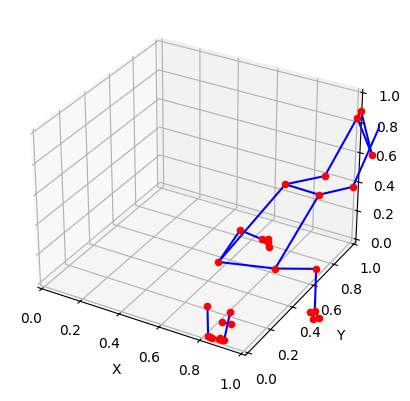

In [34]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Initialize OpenCV Video Capture
cap = cv2.VideoCapture(0)

# Initialize Matplotlib figure for 3D visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
    
        # Convert the image to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
        # Perform pose estimation
        results = pose.process(rgb_frame)
    
        # Clear the previous plot
        ax.cla()
    
        # Plot the pose landmarks in 3D
        if results.pose_landmarks:
            # Extract landmarks
            landmarks = results.pose_landmarks.landmark
    
            # Plot each landmark
            for landmark in landmarks:
                ax.scatter(landmark.x, landmark.y, landmark.z, c='r', marker='o')
    
            # Draw connections between landmarks
            connections = mp_pose.POSE_CONNECTIONS
            for connection in connections:
                start_point = connection[0]
                end_point = connection[1]
                x = [landmarks[start_point].x, landmarks[end_point].x]
                y = [landmarks[start_point].y, landmarks[end_point].y]
                z = [landmarks[start_point].z, landmarks[end_point].z]
                ax.plot(x, y, z, c='b')
    
        # Set plot limits and labels
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_zlim(0, 1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    
        # Show plot
        plt.pause(0.001)
    
        # Display the frame
        cv2.imshow('Pose Estimation', frame)
    
        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the VideoCapture and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


C:\Users\k.vidya\AppData\Local\Temp\ipykernel_8768\754795432.py:72: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  plot_img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


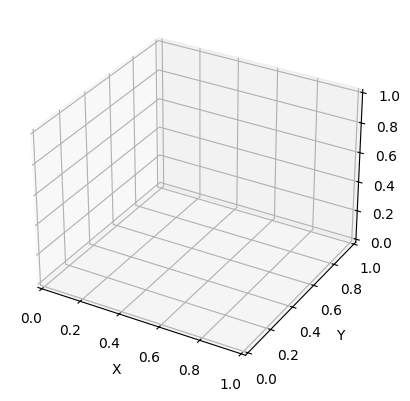

In [40]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Initialize OpenCV Video Capture
cap = cv2.VideoCapture(0)

# Create a Matplotlib figure for 3D visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Function to update 3D pose graph
def update_3d_pose(ax, landmarks):
    # Clear the previous plot
    ax.clear()

    # Plot the pose landmarks in 3D
    for landmark in landmarks:
        ax.scatter(landmark[0], landmark[1], landmark[2], c='r', marker='o')

    # Draw connections between landmarks
    mp_pose.POSE_CONNECTIONS
    for connection in mp_pose.POSE_CONNECTIONS:
        start_point_idx, end_point_idx = connection
        start_point = landmarks[start_point_idx]
        end_point = landmarks[end_point_idx]
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], [start_point[2], end_point[2]], c='b')

    # Set plot limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
    
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
    
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        # Render detections
        if results.pose_landmarks:
            # Extract landmarks
            landmarks = []
            for landmark in results.pose_landmarks.landmark:
                x = int(landmark.x * frame.shape[1])
                y = int(landmark.y * frame.shape[0])
                z = landmark.z
                landmarks.append([x, y, z])
    
            # Update the 3D plot with pose landmarks
            update_3d_pose(ax, landmarks)
    
            # Convert the Matplotlib figure to an image
            fig.canvas.draw()
            plot_img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
            plot_img = plot_img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
            # Combine the 3D plot with the original frame
            combined_img = np.hstack((image, cv2.cvtColor(plot_img, cv2.COLOR_RGB2BGR)))
    
            # Display the combined image
            cv2.imshow('Pose Estimation', combined_img)
    
        else:
            # Display the original frame if no landmarks are detected
            cv2.imshow('Pose Estimation', image)
    
        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the VideoCapture and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


In [38]:
cap.release()
cv2.destroyAllWindows()

### edho leg exercise for the left side only, don't consider it for the right side, inka cheyali ra ayya

In [51]:
cap = cv2.VideoCapture(0)

def calculate_angle(a,b,c):
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.60, min_tracking_confidence=0.60) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        

        cv2.putText(image, "Gym Trainer", 
                           (500,25), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
        
        try:
            landmarks = results.pose_landmarks.landmark


            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]

            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

            left_knee_coor = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].z] 
            right_knee_coor = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].z]


            # Calculate angle
            right_body_angle = calculate_angle(right_ankle,right_hip,right_shoulder)
            left_body_angle = calculate_angle(left_knee,left_hip,left_shoulder)
            left_knee_angle = calculate_angle(left_hip,left_knee,left_ankle)
            right_knee_angle = calculate_angle(right_hip,right_knee,right_ankle)


            # Visualize angle
            
            #right_hip_angle
            cv2.putText(image, str(right_body_angle), 
                           tuple(np.multiply(right_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_hip_angle
            cv2.putText(image, str(left_body_angle), 
                           tuple(np.multiply(left_hip, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #right_knee_angle
            cv2.putText(image, str(right_knee_angle), 
                           tuple(np.multiply(right_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )
            #left_knee_angle
            cv2.putText(image, str(left_knee_angle), 
                           tuple(np.multiply(left_knee, [640,480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2, cv2.LINE_AA
                                )

            # Body Corrections
            
            # if 165 < right_knee_angle < 180:
            #     cv2.putText(image, "good for right knee", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            # else:
            #     cv2.putText(image, "make proper angle for right knee.", (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
                
            # if 165 < left_body_angle < 180 and 165 < right_body_angle < 180:
            #     cv2.putText(image, "good for both hips", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            # # elif 70 < left_body_angle < 90:
            # #     cv2.putText(image, "up", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
            # else:
            #     cv2.putText(image, "make proper Straighten your body.", (25,50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)

            # if 165 < right_body_angle < 180:
            #     cv2.putText(image, "good for right hip", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)
            # else:
            #     cv2.putText(image, "make proper angle for right hip.", (25,75), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 0), 2, cv2.LINE_AA)



            # Visualize angles
            cv2.putText(image, "Left knee z-coord: " + str(round(left_knee_coor[-1], 2)), (25, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "right knee z-coord: " + str(round(right_knee_coor[-1], 2)), (25, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left knee x-coord: " + str(round(left_knee_coor[0], 2)), (25, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "right knee x-coord: " + str(round(right_knee_coor[0], 2)), (25, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left knee y-coord: " + str(round(left_knee_coor[1], 2)), (25, 125), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "right knee y-coord: " + str(round(right_knee_coor[1], 2)), (25, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left hip Angle: " + str(round(left_body_angle, 2)), (25, 175), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right hip Angle: " + str(round(right_body_angle, 2)), (25, 200), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Left knee Angle: " + str(round(left_knee_angle, 2)), (25, 225), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, "Right knee Angle: " + str(round(right_knee_angle, 2)), (25, 250), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            

        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )     

    
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
